In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns
import statsmodels.formula.api as smf
from pylab import *
import datetime

%matplotlib inline

df = pd.read_excel('Analyst_Data.xls', sheetname=7)
df

,Organic,Adv,Total
2015-04-01,5032,504,5536
2015-04-02,5252,563,5815
2015-04-03,5799,573,6372
2015-04-04,5968,620,6588
2015-04-05,5637,577,6214
2015-04-06,5393,529,5922
2015-04-07,5219,472,5691
2015-04-08,5140,494,5634
2015-04-09,5329,538,5867
2015-04-10,5760,629,6389


In [43]:
## data exploration
df.apply(pd.to_numeric, errors='ignore').info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2015-04-01 to 2015-09-30
Freq: D
Data columns (total 3 columns):
Organic     183 non-null int64
Adv         183 non-null int64
Total       183 non-null int64
dtypes: int64(3)
memory usage: 5.7 KB


In [44]:
df = df.rename(columns={'Organic ': 'organic', 'Adv': 'adv', 'Total': 'total'})

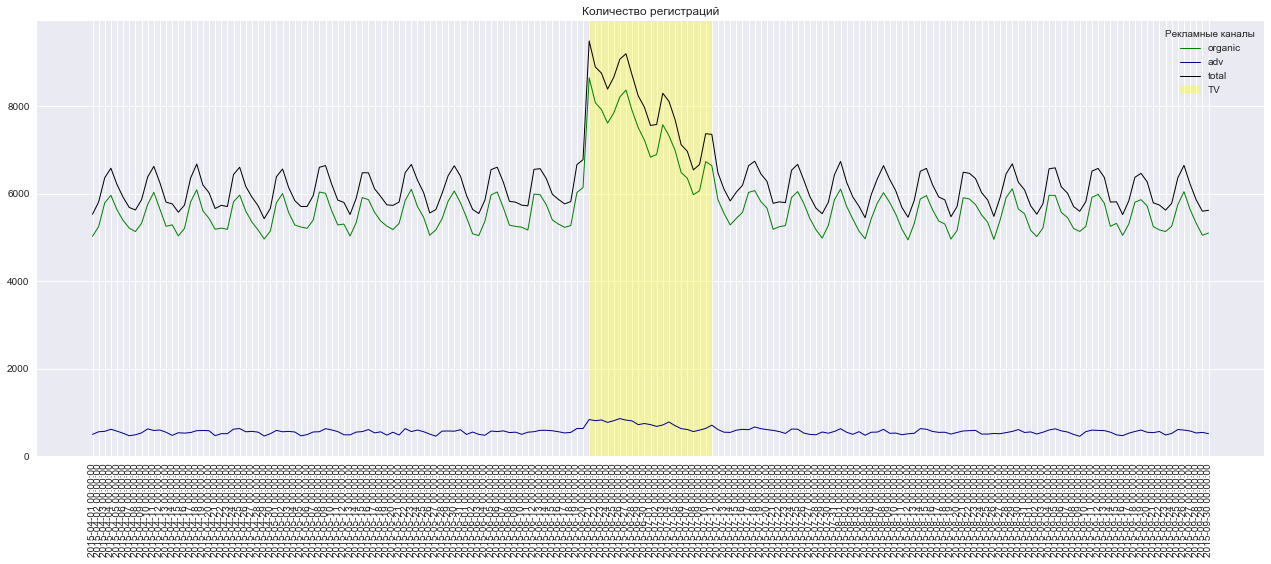

In [45]:
## строим график каналов
fig = plt.figure(figsize=(22, 8))
ax = fig.add_subplot(1,1,1)
plt.xticks(range(len(df.index)), df.index)
ax.plot(range(len(df['organic'])), df['organic'], label='organic', color="green", linewidth=1)
ax.plot(range(len(df['adv'])), df['adv'], label='adv', color="darkblue", linewidth=1)
ax.plot(range(len(df['total'])), df['total'], label='total', color="black", linewidth=1)


##plt.yticks(range(50, 550, 50))
plt.axvspan(ymin=0, ymax=1, xmin=81, xmax=101, alpha=.3, color='yellow', label='TV')


ax.legend(loc=1, title='Рекламные каналы')
plt.xticks(rotation='vertical')


ax.set_title("Количество регистраций")

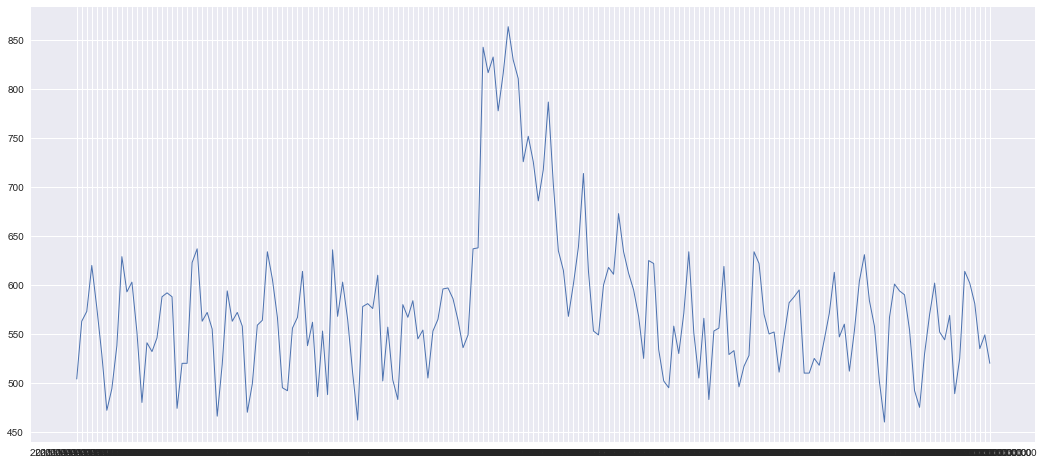

In [46]:
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(1,1,1)
plt.xticks(range(len(df.index)), df.index)
ax.plot(range(len(df['adv'])), df['adv'], label='adv', linewidth=1)


In [47]:
df['total']

2015-04-01    5536
2015-04-02    5815
2015-04-03    6372
2015-04-04    6588
2015-04-05    6214
2015-04-06    5922
2015-04-07    5691
2015-04-08    5634
2015-04-09    5867
2015-04-10    6389
2015-04-11    6631
2015-04-12    6252
2015-04-13    5812
2015-04-14    5774
2015-04-15    5583
2015-04-16    5744
2015-04-17    6363
2015-04-18    6684
2015-04-19    6206
2015-04-20    6030
2015-04-21    5667
2015-04-22    5739
2015-04-23    5712
2015-04-24    6444
2015-04-25    6611
2015-04-26    6170
2015-04-27    5928
2015-04-28    5731
2015-04-29    5435
2015-04-30    5669
              ... 
2015-09-01    5729
2015-09-02    5537
2015-09-03    5774
2015-09-04    6575
2015-09-05    6597
2015-09-06    6161
2015-09-07    6019
2015-09-08    5712
2015-09-09    5603
2015-09-10    5825
2015-09-11    6524
2015-09-12    6583
2015-09-13    6381
2015-09-14    5814
2015-09-15    5820
2015-09-16    5528
2015-09-17    5842
2015-09-18    6381
2015-09-19    6471
2015-09-20    6277
2015-09-21    5797
2015-09-22  

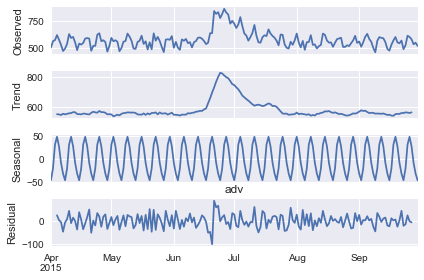

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['adv'], model='addictive')
result.plot()
adv_trend = result.trend
df['adv_trend'] = adv_trend
plt.title('adv')
plt.show()

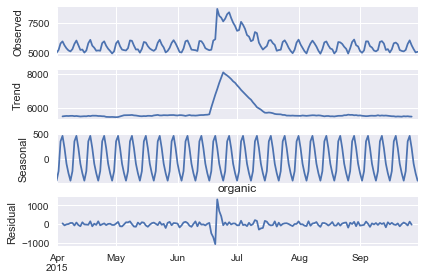

In [49]:
result = seasonal_decompose(df['organic'], model='addictive')
result.plot()
organic_trend = result.trend
df['organic_trend'] = organic_trend
plt.title('organic')
plt.show()

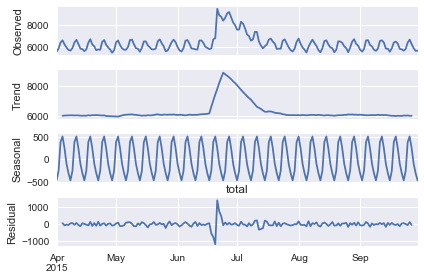

183

In [50]:
result = seasonal_decompose(df['total'], model='addictive')
result.plot()
plt.title('total')
plt.show()
total_trend = result.trend
df['total_trend'] = total_trend
len(total_trend)

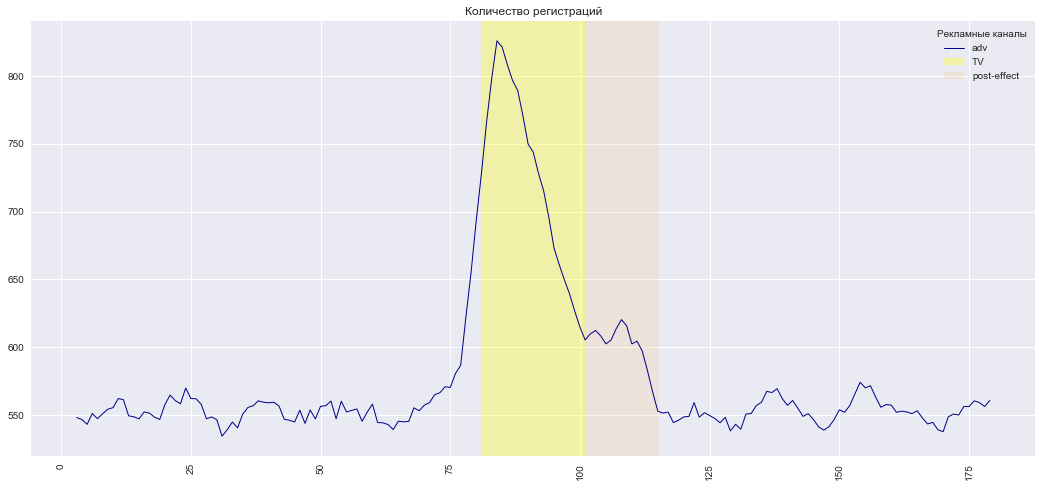

In [51]:
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(1,1,1)
ax.plot(range(len(df['adv'])), adv_trend, label='adv', color="darkblue", linewidth=1)


plt.xticks(rotation='vertical')


ax.set_title("Количество регистраций")

##plt.yticks(range(50, 550, 50))
plt.axvspan(ymin=0, ymax=1, xmin=81, xmax=101, alpha=.3, color='yellow', label='TV')
plt.axvspan(ymin=0, ymax=1, xmin=101, xmax=115, alpha=.1, color='orange', label='post-effect')


ax.legend(loc=1, title='Рекламные каналы')




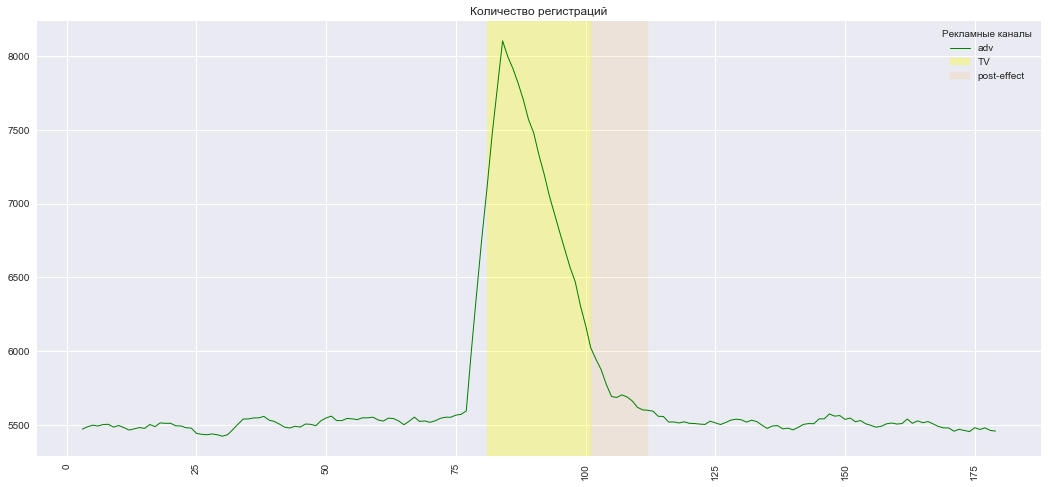

In [52]:
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(1,1,1)
ax.plot(range(len(organic_trend)), organic_trend, label='adv', color="green", linewidth=1)


plt.xticks(rotation='vertical')


ax.set_title("Количество регистраций")

##plt.yticks(range(50, 550, 50))
plt.axvspan(ymin=0, ymax=1, xmin=81, xmax=101, alpha=.3, color='yellow', label='TV')
plt.axvspan(ymin=0, ymax=1, xmin=101, xmax=112, alpha=.1, color='orange', label='post-effect')

ax.legend(loc=1, title='Рекламные каналы')






In [53]:
df = df[['organic', 'organic_trend', 'adv', 'adv_trend', 'total', 'total_trend']]

In [54]:
df

,organic,organic_trend,adv,adv_trend,total,total_trend
2015-04-01,5032,NaN,504,NaN,5536,NaN
2015-04-02,5252,NaN,563,NaN,5815,NaN
2015-04-03,5799,NaN,573,NaN,6372,NaN
2015-04-04,5968,5471.428571,620,548.285714,6588,6019.714286
2015-04-05,5637,5486.857143,577,546.857143,6214,6033.714286
2015-04-06,5393,5497.857143,529,543.285714,5922,6041.142857
2015-04-07,5219,5492.285714,472,551.285714,5691,6043.571429
2015-04-08,5140,5502.285714,494,547.428571,5634,6049.714286
2015-04-09,5329,5504.000000,538,551.142857,5867,6055.142857
2015-04-10,5760,5485.000000,629,554.428571,6389,6039.428571


In [55]:
organic_before = (np.mean(organic_trend[:81]) + np.mean(organic_trend[113:])) / 2
organic_before

5526.246965720847

organic_tv = np.mean(organic_trend[81:102])
organic_tv

In [71]:
org_tv = np.mean(organic_trend[81:102])
org_tv

7167.176870748298

In [56]:
post_effect = np.mean(organic_trend[102:113])
post_effect

5713.064935064934

In [57]:
org_newbie = df['organic_trend'] - organic_before

In [58]:
org_newbie[81:113].sum()

36514.52566836145

In [59]:
adv_before = (np.mean(adv_trend[:81]) + np.mean(adv_trend[116:])) / 2
adv_tv = np.mean(adv_trend[81:102])
adv_post_effect = np.mean(adv_trend[102:116])

In [60]:
adv_before

555.3665865384617

In [61]:
adv_tv

724.1564625850339

In [62]:
adv_post_effect

599.7653061224489

In [63]:
adv_newbie = df['adv_trend'] - adv_before

In [64]:
adv_newbie[81:116].sum()

4166.169471153841

In [67]:
newbies_by_tv = org_newbie[81:113].sum() + adv_newbie[81:116].sum()

In [68]:
newbies_by_tv

40680.695139515294